In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

# theta

In [166]:
theta_data = pd.read_csv('theta-usd-max.csv', index_col = 'snapped_at')
theta_data.index = pd.to_datetime(theta_data.index)

## reference: 17 January 2018 and ends on 20 November 2021
## actual: 03 July 2018 and ends on 20 June 2022
theta_data1 = theta_data.loc['2018-07-03 00:00:00 UTC':'2022-06-20 00:00:00 UTC'].copy()
theta_data1['return'] = np.log(theta_data1['price']/theta_data1['price'].shift(1))
theta_data1['volatility'] = theta_data1['return']**2
theta_data1

,price,market_cap,total_volume,return,volatility
snapped_at,,,,,
2018-07-03 00:00:00+00:00,0.163314,1.084247e+08,1.411856e+07,NaN,NaN
2018-07-04 00:00:00+00:00,0.163810,1.087541e+08,1.589027e+07,0.003033,0.000009
2018-07-05 00:00:00+00:00,0.161374,1.071364e+08,1.135845e+07,-0.014987,0.000225
2018-07-06 00:00:00+00:00,0.154385,1.024965e+08,1.186984e+07,-0.044274,0.001960
2018-07-07 00:00:00+00:00,0.157056,1.042701e+08,9.547517e+06,0.017156,0.000294
...,...,...,...,...,...
2022-06-16 00:00:00+00:00,1.340111,1.347257e+09,1.207662e+08,0.151146,0.022845
2022-06-17 00:00:00+00:00,1.182240,1.182887e+09,1.220302e+08,-0.125341,0.015710
2022-06-18 00:00:00+00:00,1.210705,1.214253e+09,8.594406e+07,0.023792,0.000566


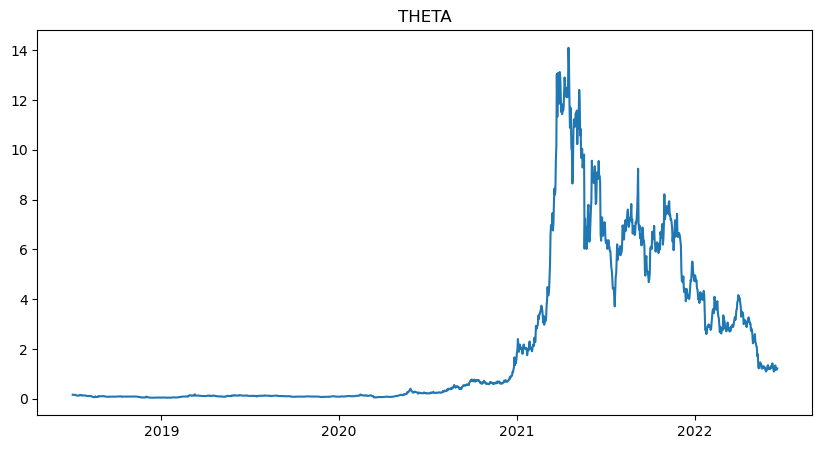

In [167]:
#price
plt.figure(figsize=(10,5))
plt.plot(theta_data1['price'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/price_ts_image/theta_price.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/price_ts_image/theta_price.pdf")
            
plt.show()


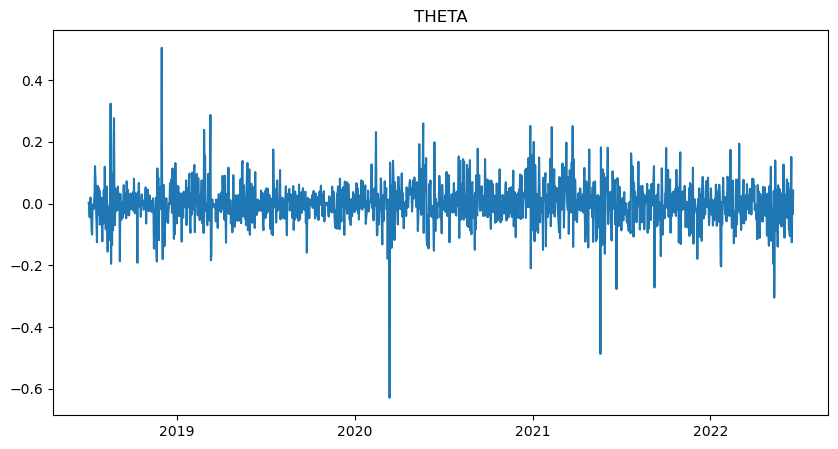

In [168]:
## return 
plt.figure(figsize=(10,5))
plt.plot(theta_data1['return'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/return_ts_image/theta_return.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/return_ts_image/theta_return.pdf")
plt.show()

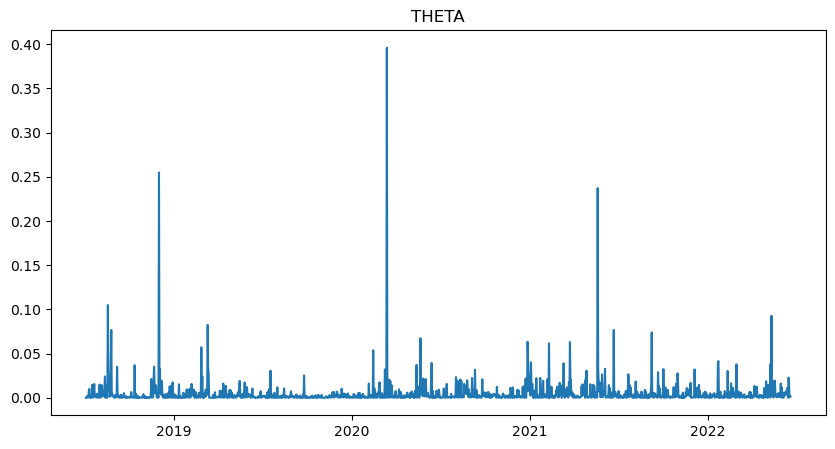

In [169]:
## volatility
plt.figure(figsize=(10,5))
plt.plot(theta_data1['volatility'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/volatility_ts_image/theta_volatility.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/volatility_ts_image/theta_volatility.pdf")
plt.show()

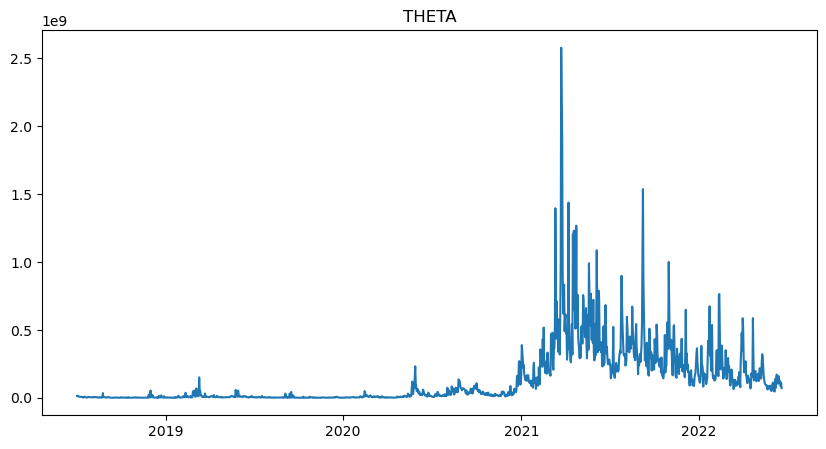

In [171]:
##total volume
plt.figure(figsize=(10,5))
plt.plot(theta_data1['total_volume'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/total_volume_ts_image/theta_vol.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/total_volume_ts_image/theta_vol.pdf")
plt.show()

## detrended volume

In [172]:
theta_data1['log_volume'] = np.log(theta_data1['total_volume'])

In [173]:
T = len(theta_data1['log_volume'])
t = np.arange(1, T+1) #当前时刻

X = sm.add_constant(np.column_stack((t/T, (t/T)**2)))
model = sm.OLS(theta_data1['log_volume'], X).fit()

detrended_volume = model.resid

model.summary(), detrended_volume

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:             log_volume   R-squared:                       0.693
 Model:                            OLS   Adj. R-squared:                  0.692
 Method:                 Least Squares   F-statistic:                     1630.
 Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
 Time:                        22:56:10   Log-Likelihood:                -2231.6
 No. Observations:                1449   AIC:                             4469.
 Df Residuals:                    1446   BIC:                             4485.
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [174]:
theta_data1['detrended_volume'] = detrended_volume
theta_data1

,price,market_cap,total_volume,return,volatility,log_volume,detrended_volume
snapped_at,,,,,,,
2018-07-03 00:00:00+00:00,0.163314,1.084247e+08,1.411856e+07,NaN,NaN,16.463001,2.121931
2018-07-04 00:00:00+00:00,0.163810,1.087541e+08,1.589027e+07,0.003033,0.000009,16.581217,2.236859
2018-07-05 00:00:00+00:00,0.161374,1.071364e+08,1.135845e+07,-0.014987,0.000225,16.245472,1.897825
2018-07-06 00:00:00+00:00,0.154385,1.024965e+08,1.186984e+07,-0.044274,0.001960,16.289511,1.938574
2018-07-07 00:00:00+00:00,0.157056,1.042701e+08,9.547517e+06,0.017156,0.000294,16.071792,1.717563
...,...,...,...,...,...,...,...
2022-06-16 00:00:00+00:00,1.340111,1.347257e+09,1.207662e+08,0.151146,0.022845,18.609367,-1.572864
2022-06-17 00:00:00+00:00,1.182240,1.182887e+09,1.220302e+08,-0.125341,0.015710,18.619779,-1.567255
2022-06-18 00:00:00+00:00,1.210705,1.214253e+09,8.594406e+07,0.023792,0.000566,18.269207,-1.922631


In [175]:
theta_data1['detrended_volume'].mean()

-6.335550135279845e-15

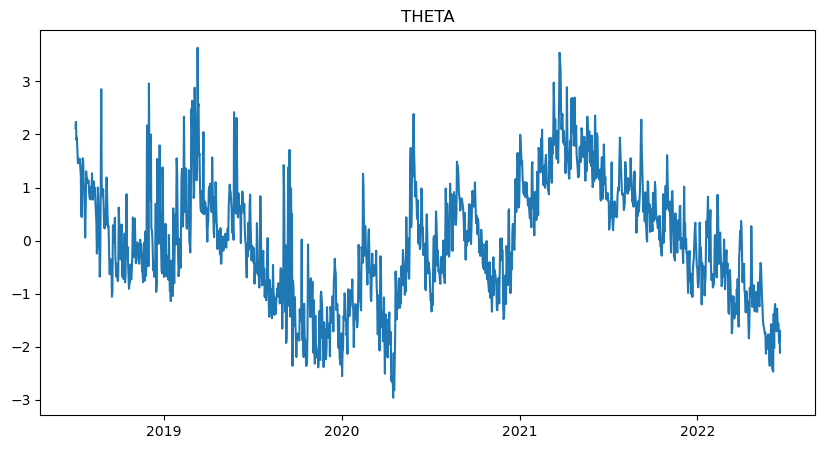

In [91]:
plt.figure(figsize=(10,5))
plt.plot(detrended_volume)

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/detrend_volume_ts_image/theta_vol.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/detrend_volume_ts_image/theta_vol.pdf")
plt.show()

In [92]:
df = theta_data1[["return", "volatility","detrended_volume"]].dropna()
df

,return,volatility,detrended_volume
snapped_at,,,
2018-07-04 00:00:00+00:00,0.003033,0.000009,2.236859
2018-07-05 00:00:00+00:00,-0.014987,0.000225,1.897825
2018-07-06 00:00:00+00:00,-0.044274,0.001960,1.938574
2018-07-07 00:00:00+00:00,0.017156,0.000294,1.717563
2018-07-08 00:00:00+00:00,0.019465,0.000379,1.456642
...,...,...,...
2022-06-16 00:00:00+00:00,0.151146,0.022845,-1.572864
2022-06-17 00:00:00+00:00,-0.125341,0.015710,-1.567255
2022-06-18 00:00:00+00:00,0.023792,0.000566,-1.922631


In [179]:
len(theta_data1)

1449

In [180]:
len(df)

1448

In [181]:
df['detrended_volume'].sum()

-2.121930809789177

In [182]:
theta_data1['detrended_volume'].sum()

-9.180212146020494e-12

In [93]:
from statsmodels.stats.stattools import jarque_bera

descriptive_stats = df.describe().T[['mean', 'max', 'min', 'std']]
descriptive_stats['skew'] = df.skew()
descriptive_stats['kurt'] = df.kurtosis()
descriptive_stats['jarque_bera'] = [jarque_bera(df[col])[0] for col in df]
descriptive_stats.T

,return,volatility,detrended_volume
mean,0.001389,5.024082e-03,-0.001465
max,0.504960,3.960635e-01,3.632587
min,-0.629336,0.000000e+00,-2.961297
std,0.070892,1.639483e-02,1.128223
skew,-0.325625,1.462743e+01,0.090537
kurt,8.707760,2.904498e+02,-0.388669
jarque_bera,4564.472227,5.106115e+06,11.220072


# xtz

In [94]:
xtz_data = pd.read_csv('xtz-usd-max.csv', index_col = 'snapped_at')
xtz_data.index = pd.to_datetime(xtz_data.index)
xtz_data1 = xtz_data.loc['2018-07-03 00:00:00 UTC':'2022-06-20 00:00:00 UTC'].copy()
xtz_data1['return'] = np.log(xtz_data1['price']/xtz_data1['price'].shift(1))
xtz_data1['volatility'] = xtz_data1['return']**2
xtz_data1

,price,market_cap,total_volume,return,volatility
snapped_at,,,,,
2018-07-03 00:00:00+00:00,2.937866,0.000000e+00,3.172538e+06,NaN,NaN
2018-07-04 00:00:00+00:00,2.047985,0.000000e+00,1.426545e+07,-0.360827,0.130196
2018-07-05 00:00:00+00:00,1.969392,1.196384e+09,6.492796e+06,-0.039132,0.001531
2018-07-06 00:00:00+00:00,1.528033,9.282631e+08,8.681129e+06,-0.253744,0.064386
2018-07-07 00:00:00+00:00,1.796304,1.091235e+09,1.617507e+07,0.161750,0.026163
...,...,...,...,...,...
2022-06-16 00:00:00+00:00,1.522075,1.357033e+09,1.098920e+08,0.044241,0.001957
2022-06-17 00:00:00+00:00,1.359598,1.208137e+09,1.365362e+08,-0.112885,0.012743
2022-06-18 00:00:00+00:00,1.389117,1.237141e+09,6.590962e+07,0.021479,0.000461


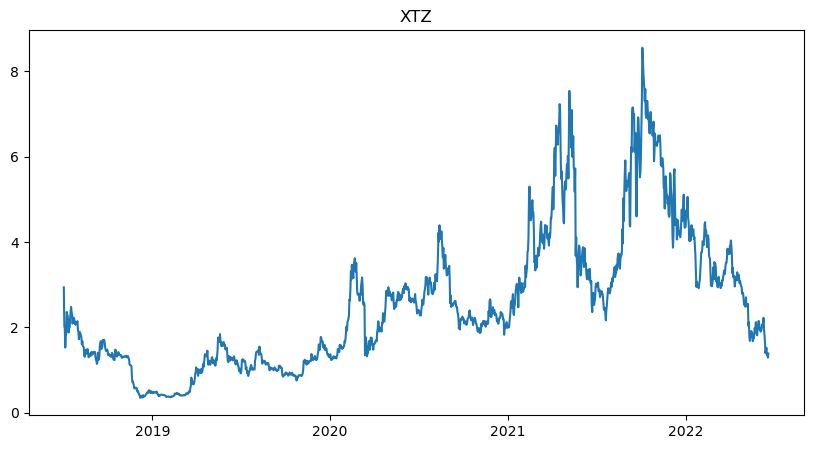

In [95]:
##price
plt.figure(figsize=(10,5))
plt.plot(xtz_data1['price'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('XTZ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/price_ts_image/XTZ_price.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/price_ts_image/XTZ_price.pdf")
plt.show()

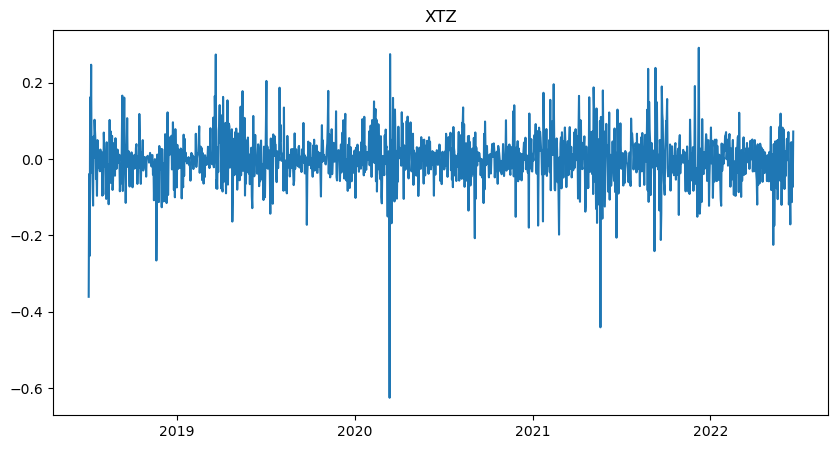

In [96]:
## return
plt.figure(figsize=(10,5))
plt.plot(xtz_data1['return'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('XTZ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/return_ts_image/XTZ_return.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/return_ts_image/XTZ_return.pdf")
plt.show()

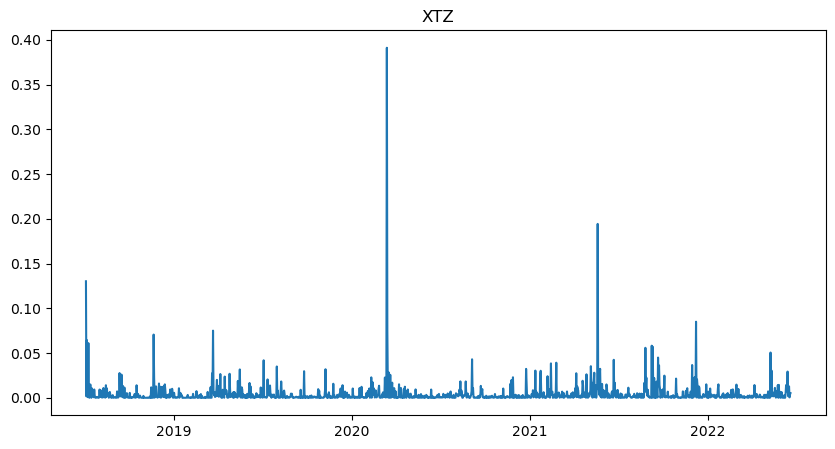

In [97]:
## volatility
plt.figure(figsize=(10,5))
plt.plot(xtz_data1['volatility'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('XTZ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/volatility_ts_image/XTZ_volatility.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/volatility_ts_image/XTZ_volatility.pdf")
plt.show()

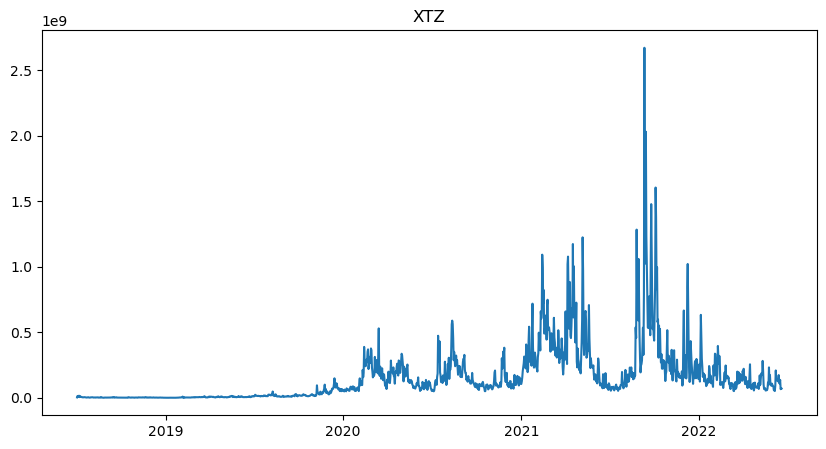

In [98]:
##total volume
plt.figure(figsize=(10,5))
plt.plot(xtz_data1['total_volume'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('XTZ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/total_volume_ts_image/xtz_vol.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/total_volume_ts_image/xtz_vol.pdf")
plt.show()

# detrend volume

In [99]:
xtz_data1['log_volume'] = np.log(xtz_data1['total_volume'])

In [100]:
T = len(xtz_data1['log_volume'])
t = np.arange(1, T+1) #当前时刻

X = sm.add_constant(np.column_stack((t/T, (t/T)**2)))
model = sm.OLS(xtz_data1['log_volume'], X).fit()   #y X

detrended_volume_xtz = model.resid #use the residual as the detrend volume

model.summary(), detrended_volume_xtz

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:             log_volume   R-squared:                       0.836
 Model:                            OLS   Adj. R-squared:                  0.836
 Method:                 Least Squares   F-statistic:                     3680.
 Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
 Time:                        10:12:57   Log-Likelihood:                -1685.8
 No. Observations:                1449   AIC:                             3378.
 Df Residuals:                    1446   BIC:                             3393.
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [101]:
xtz_data1['detrended_volume'] = detrended_volume_xtz
xtz_data1

,price,market_cap,total_volume,return,volatility,log_volume,detrended_volume
snapped_at,,,,,,,
2018-07-03 00:00:00+00:00,2.937866,0.000000e+00,3.172538e+06,NaN,NaN,14.970042,1.722857
2018-07-04 00:00:00+00:00,2.047985,0.000000e+00,1.426545e+07,-0.360827,0.130196,16.473351,3.215163
2018-07-05 00:00:00+00:00,1.969392,1.196384e+09,6.492796e+06,-0.039132,0.001531,15.686204,2.417023
2018-07-06 00:00:00+00:00,1.528033,9.282631e+08,8.681129e+06,-0.253744,0.064386,15.976662,2.696499
2018-07-07 00:00:00+00:00,1.796304,1.091235e+09,1.617507e+07,0.161750,0.026163,16.598982,3.307847
...,...,...,...,...,...,...,...
2022-06-16 00:00:00+00:00,1.522075,1.357033e+09,1.098920e+08,0.044241,0.001957,18.515009,-0.148205
2022-06-17 00:00:00+00:00,1.359598,1.208137e+09,1.365362e+08,-0.112885,0.012743,18.732100,0.072397
2022-06-18 00:00:00+00:00,1.389117,1.237141e+09,6.590962e+07,0.021479,0.000461,18.003795,-0.652387


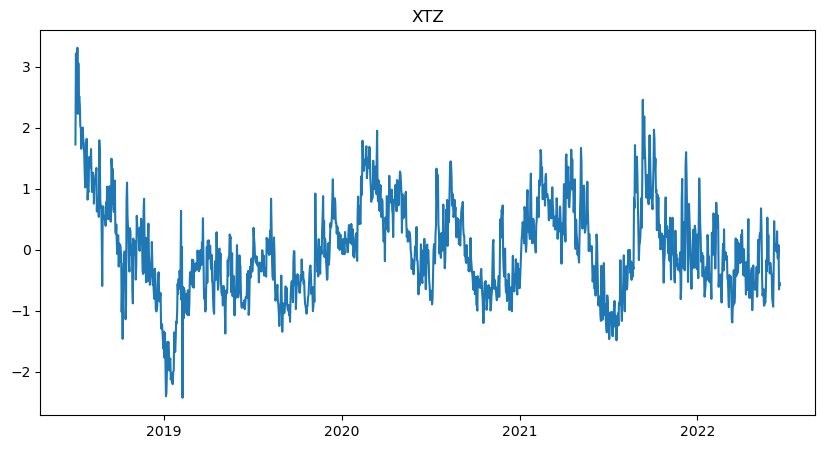

In [102]:
plt.figure(figsize=(10,5))
plt.plot(detrended_volume_xtz)

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('XTZ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/detrend_volume_ts_image/xtz_vol.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/detrend_volume_ts_image/xtz_vol.pdf")
plt.show()

# enj

In [103]:
enj_data = pd.read_csv('enj-usd-max.csv', index_col = 'snapped_at')
enj_data.index = pd.to_datetime(enj_data.index)
enj_data1 = enj_data.loc['2018-07-03 00:00:00 UTC':'2022-06-20 00:00:00 UTC'].copy()
enj_data1['return'] = np.log(enj_data1['price']/enj_data1['price'].shift(1))
enj_data1['volatility'] = enj_data1['return']**2
enj_data1

,price,market_cap,total_volume,return,volatility
snapped_at,,,,,
2018-07-03 00:00:00+00:00,0.063055,4.768181e+07,1.853612e+06,NaN,NaN
2018-07-04 00:00:00+00:00,0.060172,4.550128e+07,1.964800e+06,-0.046810,0.002191
2018-07-05 00:00:00+00:00,0.063566,4.806837e+07,1.856020e+06,0.054884,0.003012
2018-07-06 00:00:00+00:00,0.062161,4.700574e+07,1.761013e+06,-0.022355,0.000500
2018-07-07 00:00:00+00:00,0.060889,4.604359e+07,1.704383e+06,-0.020681,0.000428
...,...,...,...,...,...
2022-06-16 00:00:00+00:00,0.482491,4.505599e+08,1.065685e+08,0.056496,0.003192
2022-06-17 00:00:00+00:00,0.427129,3.988351e+08,7.169946e+07,-0.121876,0.014854
2022-06-18 00:00:00+00:00,0.441768,4.127615e+08,5.377738e+07,0.033698,0.001136


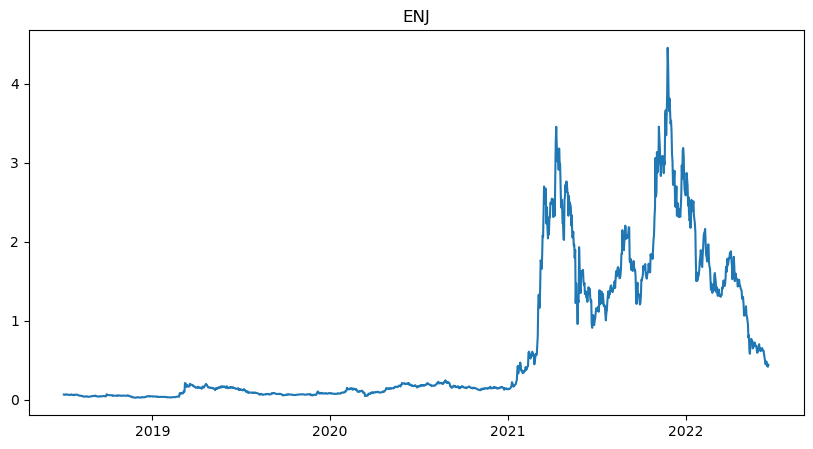

In [104]:
## price
plt.figure(figsize=(10,5))
plt.plot(enj_data1['price'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('ENJ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/price_ts_image/ENJ_price.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/price_ts_image/ENJ_price.pdf")
plt.show()

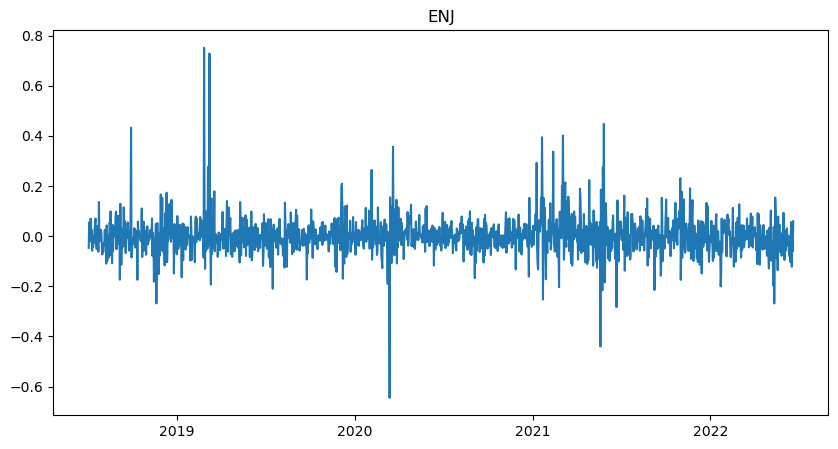

In [105]:
#return
plt.figure(figsize=(10,5))
plt.plot(enj_data1['return'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('ENJ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/return_ts_image/ENJ_return.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/return_ts_image/ENJ_return.pdf")
plt.show()

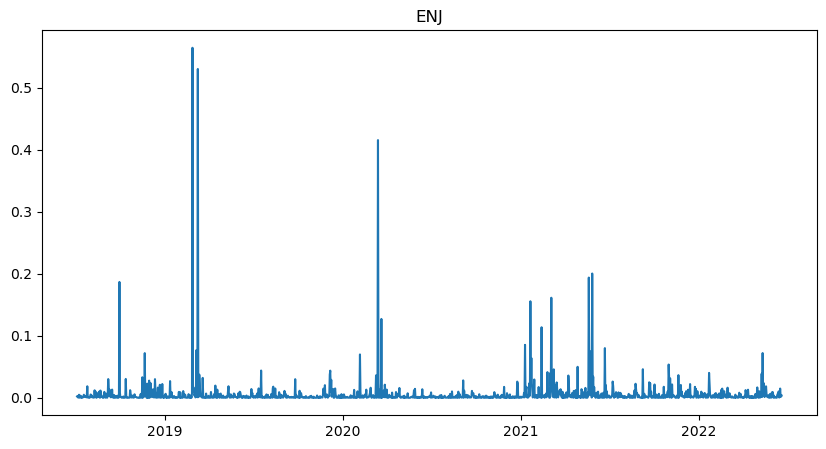

In [106]:
#return
plt.figure(figsize=(10,5))
plt.plot(enj_data1['volatility'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('ENJ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/volatility_ts_image/ENJ_volatility.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/volatility_ts_image/ENJ_volatility.pdf")
plt.show()

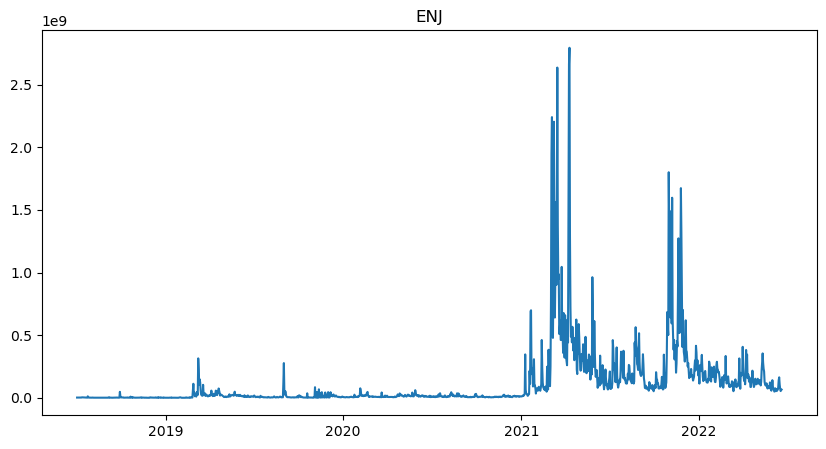

In [107]:
#return
plt.figure(figsize=(10,5))
plt.plot(enj_data1['total_volume'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('ENJ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/total_volume_ts_image/enj_vol.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/total_volume_ts_image/enj_vol.pdf")
plt.show()

# detrend volume

In [108]:
enj_data1['log_volume'] = np.log(enj_data1['total_volume'])

In [109]:
T = len(enj_data1['log_volume'])
t = np.arange(1, T+1) #当前时刻

X = sm.add_constant(np.column_stack((t/T, (t/T)**2)))
model = sm.OLS(enj_data1['log_volume'], X).fit()   #y X

detrended_volume_enj = model.resid #use the residual as the detrend volume

model.summary(), detrended_volume_enj

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:             log_volume   R-squared:                       0.660
 Model:                            OLS   Adj. R-squared:                  0.659
 Method:                 Least Squares   F-statistic:                     1403.
 Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
 Time:                        10:12:59   Log-Likelihood:                -2272.7
 No. Observations:                1449   AIC:                             4551.
 Df Residuals:                    1446   BIC:                             4567.
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [110]:
enj_data1['detrended_volume'] = detrended_volume_enj
enj_data1

,price,market_cap,total_volume,return,volatility,log_volume,detrended_volume
snapped_at,,,,,,,
2018-07-03 00:00:00+00:00,0.063055,4.768181e+07,1.853612e+06,NaN,NaN,14.432647,0.418285
2018-07-04 00:00:00+00:00,0.060172,4.550128e+07,1.964800e+06,-0.046810,0.002191,14.490901,0.472456
2018-07-05 00:00:00+00:00,0.063566,4.806837e+07,1.856020e+06,0.054884,0.003012,14.433945,0.411418
2018-07-06 00:00:00+00:00,0.062161,4.700574e+07,1.761013e+06,-0.022355,0.000500,14.381400,0.354790
2018-07-07 00:00:00+00:00,0.060889,4.604359e+07,1.704383e+06,-0.020681,0.000428,14.348714,0.318022
...,...,...,...,...,...,...,...
2022-06-16 00:00:00+00:00,0.482491,4.505599e+08,1.065685e+08,0.056496,0.003192,18.484298,-1.114230
2022-06-17 00:00:00+00:00,0.427129,3.988351e+08,7.169946e+07,-0.121876,0.014854,18.087994,-1.514186
2022-06-18 00:00:00+00:00,0.441768,4.127615e+08,5.377738e+07,0.033698,0.001136,17.800363,-1.805467


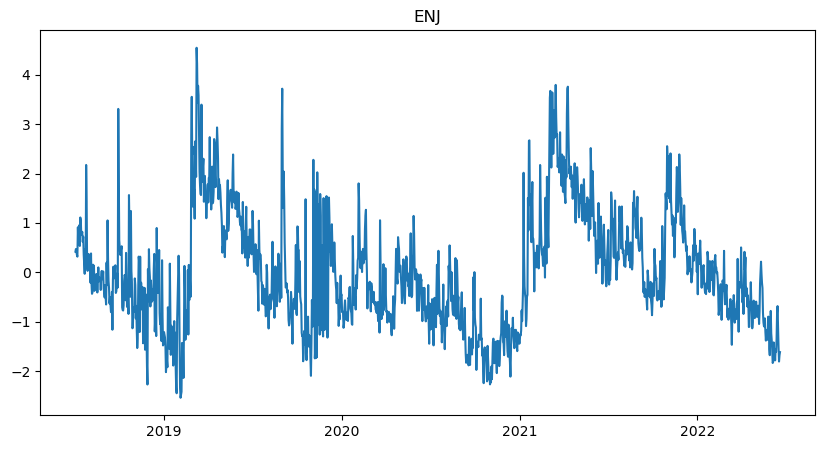

In [111]:
plt.figure(figsize=(10,5))
plt.plot(detrended_volume_enj)

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('ENJ')
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/detrend_volume_ts_image/enj_vol.jpg")
plt.savefig("D:/qf2023课程资料/JAN term/Econometrics/proj/detrend_volume_ts_image/enj_vol.pdf")
plt.show()

# TABLE 1

return

In [213]:
##df_return
theta_return = theta_data1["return"].dropna()
xtz_return = xtz_data1["return"].dropna()
enj_return = enj_data1["return"].dropna()
df_returns = pd.concat([theta_return,xtz_return,enj_return],axis = 1)

df_returns.columns = ["THETA","XTZ","ENJ"]
df_returns.dropna(inplace = True)

In [214]:
# from statsmodels.stats.stattools import jarque_bera

# descriptive_stats_returns = df_returns.describe().T[['mean', 'max', 'min', 'std']]
# descriptive_stats_returns['skew'] = df_returns.skew()
# descriptive_stats_returns['kurt'] = df_returns.kurtosis()
# descriptive_stats_returns['jarque_bera'] = [jarque_bera(df_returns[col])[0] for col in df_returns]
# descriptive_stats_returns.T

In [215]:
df_returns

,THETA,XTZ,ENJ
snapped_at,,,
2018-07-04 00:00:00+00:00,0.003033,-0.360827,-0.046810
2018-07-05 00:00:00+00:00,-0.014987,-0.039132,0.054884
2018-07-06 00:00:00+00:00,-0.044274,-0.253744,-0.022355
2018-07-07 00:00:00+00:00,0.017156,0.161750,-0.020681
2018-07-08 00:00:00+00:00,0.019465,0.026553,0.069998
...,...,...,...
2022-06-16 00:00:00+00:00,0.151146,0.044241,0.056496
2022-06-17 00:00:00+00:00,-0.125341,-0.112885,-0.121876
2022-06-18 00:00:00+00:00,0.023792,0.021479,0.033698


In [216]:
def table1_statistics(df):
    
    np.set_printoptions(suppress=True)
    descriptive_stats = df.describe().T[['mean', 'max', 'min', 'std']]
    descriptive_stats['skew'] = df.skew()
    descriptive_stats['kurt'] = df.kurtosis()
    descriptive_stats['jarque_bera'] = [jarque_bera(df[col])[0] for col in df]
    
    return descriptive_stats

In [217]:
table1_statistics(df_returns).T

,THETA,XTZ,ENJ
mean,0.001389,-0.000518,0.001343
max,0.504960,0.291551,0.751219
min,-0.629336,-0.625418,-0.644553
std,0.070892,0.065681,0.077442
skew,-0.325625,-0.757452,1.229676
kurt,8.707760,8.906589,18.048656
jarque_bera,4564.472227,4886.858456,19873.636276


volatility

In [218]:
##df_volatility
theta_vol = theta_data1["volatility"].dropna()
xtz_vol = xtz_data1["volatility"].dropna()
enj_vol = enj_data1["volatility"].dropna()
df_vol = pd.concat([theta_vol,xtz_vol,enj_vol],axis = 1)

df_vol.columns = ["THETA","XTZ","ENJ"]
df_vol.dropna(inplace = True)

In [223]:
table1_statistics(df_vol).T

,THETA,XTZ,ENJ
mean,5.024082e-03,4.311227e-03,5.994994e-03
max,3.960635e-01,3.911477e-01,5.643295e-01
min,0.000000e+00,0.000000e+00,3.166611e-09
std,1.639483e-02,1.423490e-02,2.685764e-02
skew,1.462743e+01,1.681700e+01,1.501771e+01
kurt,2.904498e+02,4.049380e+02,2.719455e+02
jarque_bera,5.106115e+06,9.892915e+06,4.485361e+06


In [220]:
#df_detrend volume
theta_volume = theta_data1['detrended_volume'].dropna()
xtz_volume = xtz_data1["detrended_volume"].dropna()
enj_volume = enj_data1["detrended_volume"].dropna()
df_volume = pd.concat([theta_volume,xtz_volume,enj_volume],axis = 1)

df_volume.columns = ["THETA","XTZ","ENJ"]
df_volume.dropna(inplace = True)

In [222]:
table1_statistics(df_volume).T

,THETA,XTZ,ENJ
mean,-0.001465,-0.001190,-0.000289
max,3.632587,3.307847,4.545502
min,-2.961297,-2.428616,-2.539292
std,1.128223,0.773737,1.162046
skew,0.090537,0.407932,0.668089
kurt,-0.388669,0.624484,0.329194
jarque_bera,11.220072,63.133525,113.824638


# calculate ADF

In [228]:
from statsmodels.tsa.stattools import adfuller

def cal_ADF(df):
    adf_result = []
    
    col = df.columns
    for i in col:
        result = adfuller(df[str(i)]) 
        adf_result.append(result[0])
        
    return adf_result
        
#     result = adfuller(data)
    
#     return result[0]  #ADF statistic


In [229]:
cal_ADF(df_returns)

[-17.81682009885879, -18.69027387011329, -40.54577423790458]

In [230]:
cal_ADF(df_vol)

[-17.04877144578868, -16.750932615267907, -7.71984683376787]

In [231]:
cal_ADF(df_volume)

[-2.6242954744232274, -4.113616508856866, -3.816419637236492]

# calculate pp statistic

In [224]:
from arch.unitroot import ADF

def cal_PP(df):
    PP_result = []
    
    col = df.columns
    for i in col:
        result = ADF(df[str(i)],trend='ct').stat  # 使用trend='ct'执行常数项和趋势项的PP检验
        PP_result.append(result)
        
    return PP_result

In [225]:
cal_PP(df_returns)

[-17.812068306332517, -18.68852752119413, -40.53873109760573]

In [226]:
cal_PP(df_vol)

[-17.044980621630135, -16.770837011997315, -7.7233230675085025]

In [227]:
cal_PP(df_volume)

[-2.6195534567080214, -4.150868824579696, -3.8132307100110636]

# calculate Q-statistic

在统计学中，Q-统计量（Q-statistic）通常用于评估时间序列数据的自相关性。Q-统计量的计算涉及对残差序列进行自相关检验。

Q-统计量的计算步骤如下：

对给定的时间序列数据进行一次回归，得到残差序列。  ？问题 此时的自变量和因变量是什么
计算残差序列的自相关系数，通常会计算若干个滞后阶的自相关系数。
将各滞后阶自相关系数的平方值相加，得到Q-统计量。

In [237]:
from arch.unitroot import ADF

def cal_Q(df):
    Q_result = []
    
    col = df.columns
    for i in col:
        # 计算自相关函数（ACF）
        acf_values = sm.tsa.acf(df[str(i)], nlags=15)
        
        # 计算Q统计量
        q_statistic = np.sum(acf_values[1:]**2)
        
        Q_result.append(q_statistic)
        
    return Q_result

In [238]:
cal_Q(df_returns)

[0.022394352332020535, 0.024749784716285743, 0.0201908518680075]

In [ ]:
acf_values, _ = sm.tsa.acf(data, nlags=15, qstat=True)